3) Follow the tutorial found at https://sep.readthedocs.io/en/v1.0.x/tutorial.htmlLinks to an external site., but use the astropy fits routines instead of fitsio. Create a notebook that performs the tutorial and comment it using Markdown to explain what it’s doing. Note that the fits image used in the tutorial can be acquired via the sep GitHub account. DONE

4) Augment the tutorial to save each of the four figures to PNG files. DONE

5) Get the f105w band image of the Hubble Ultra Deep Field, which is called

hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits

You can download it from https://archive.stsci.edu/pub/hlsp/hudf12/Links to an external site.. DONE

6) Redo the tutorial steps in a second notebook, but on the UDF f105w image. How many sources do you find? Histogram their fluxes. DONE

7) What are the mean, median, and standard deviation of the distribution of fluxes. What is the largest outlier in the distribution, where is it on the image, and how many standard deviations is it away from the mean? 

8) Download the f125w and f160w images of the HUDF at the same website, and make a 3-color false image of the UDF using RGB -> f160w, f125w, f105w. Save the image as a PNG.

In [1]:
import numpy as np
import sep

In [2]:
import fitsio
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [3]:
data = fitsio.read("./hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")

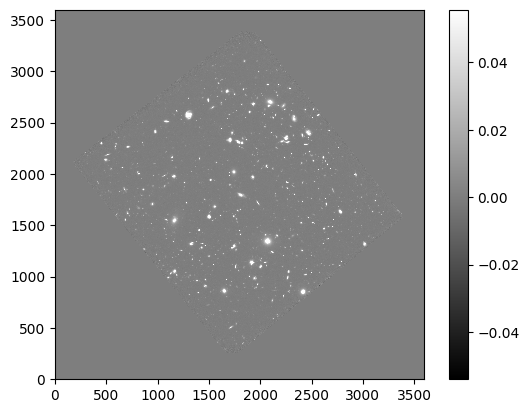

In [4]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();


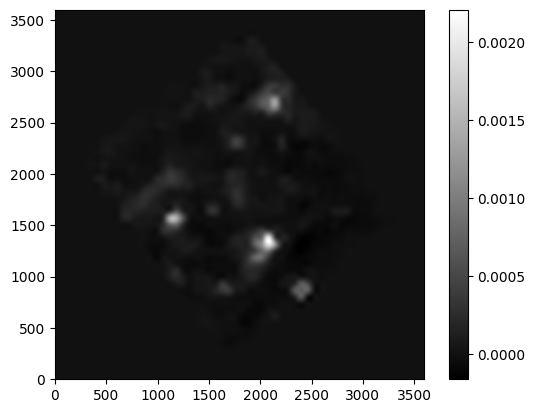

In [5]:
bkg = sep.Background(data)
bkg_image = bkg.back()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

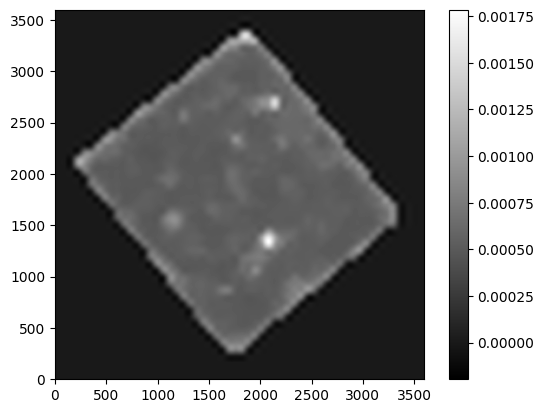

In [6]:
bkg_rms = bkg.rms()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
data_sub = data - bkg

Number of objects detected: 8640


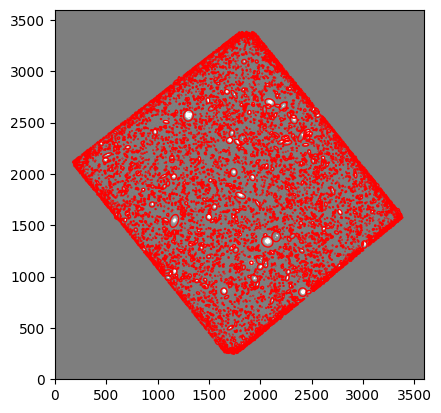

In [7]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
print("Number of objects detected: %d" % len(objects))
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(
    data_sub,
    interpolation="nearest",
    cmap="gray",
    vmin=m - s,
    vmax=m + s,
    origin="lower",
)

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(
        xy=(objects["x"][i], objects["y"][i]),
        width=6 * objects["a"][i],
        height=6 * objects["b"][i],
        angle=objects["theta"][i] * 180.0 / np.pi,
    )
    e.set_facecolor("none")
    e.set_edgecolor("red")
    ax.add_artist(e)


Amount of Sources:  8640


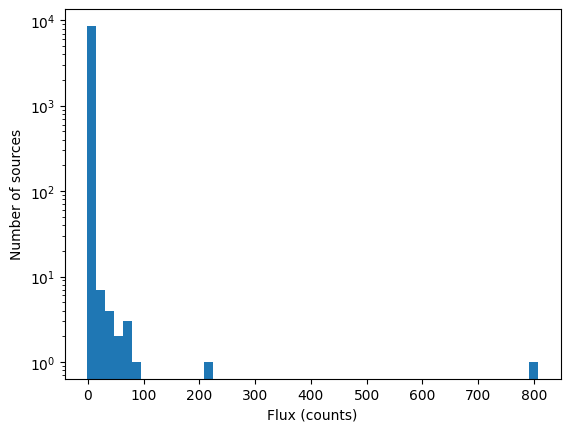

In [8]:
"""print("Amount of Sources: ", len(objects))
flux, fluxerr, flag = sep.sum_circle(data, objects["x"], objects["y"], 3.0, err=bkg.globalrms, gain=1.0)

# plot the histogram
plt.hist(flux, bins=1000)
plt.xlabel("flux")
plt.xlim(-2.5, 7.5)
plt.ylabel("number")
plt.show()"""

print("Amount of Sources: ", len(objects))
# Measure the fluxes of the detected sources using sep's sum_circle function
flux, fluxerr, flag = sep.sum_circle(
    data_sub, objects["x"], objects["y"], 3.0, err=bkg.globalrms, gain=1.0
)

# Plot a histogram of the fluxes
fig, ax = plt.subplots()
ax.hist(flux, bins=50, log=True)
ax.set_xlabel("Flux (counts)")
ax.set_ylabel("Number of sources")
plt.show()

In [9]:
# Calculate the mean, median, and standard deviation of the flux distribution
mean_flux = np.mean(flux)
median_flux = np.median(flux)
std_flux = np.std(flux)
print(f"Mean flux: {mean_flux:.2f}")
print(f"Median flux: {median_flux:.2f}")
print(f"Standard deviation of flux: {std_flux:.2f}\n")

# Find the largest outlier in the distribution, locate it on the image, and calculate how many standard deviations it is away from the mean
outlier = np.max(flux)
outlier_index = np.argmax(flux)
outlier_x, outlier_y = objects["x"][outlier_index], objects["y"][outlier_index]
outlier_std = (outlier - mean_flux) / std_flux
print(f"Largest outlier flux: {outlier:.2f}")
print(f"Largest outlier position (x, y): ({outlier_x:.2f}, {outlier_y:.2f})")
print(f"Largest outlier is {outlier_std:.2f} standard deviations away from the mean")

Mean flux: 0.36
Median flux: 0.03
Standard deviation of flux: 9.24

Largest outlier flux: 807.30
Largest outlier position (x, y): (1914.25, 1134.32)
Largest outlier is 87.30 standard deviations away from the mean


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


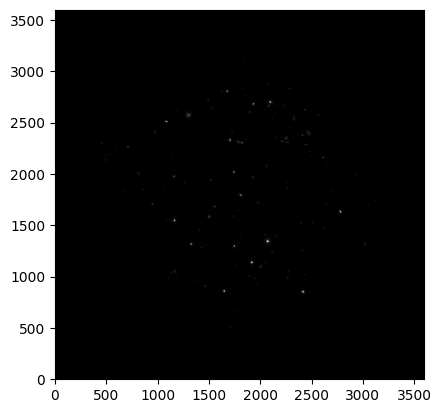

In [10]:
# Load the f125w and f160w images
data_f125w = fitsio.read("./hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
data_f160w = fitsio.read("./hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")

# Rescale the images to the same size and stack them into a 3-color image
scale_factor = np.max(data) / np.max([np.max(data_f125w), np.max(data_f160w)])
data_f125w_rescaled = data_f125w * scale_factor
data_f160w_rescaled = data_f160w * scale_factor
rgb_image = np.stack([data_f160w_rescaled, data_f125w_rescaled, data], axis=-1)

# Save the image as a PNG
plt.imshow(rgb_image, origin="lower")
plt.savefig("rgb_image.png", dpi=300, bbox_inches="tight")